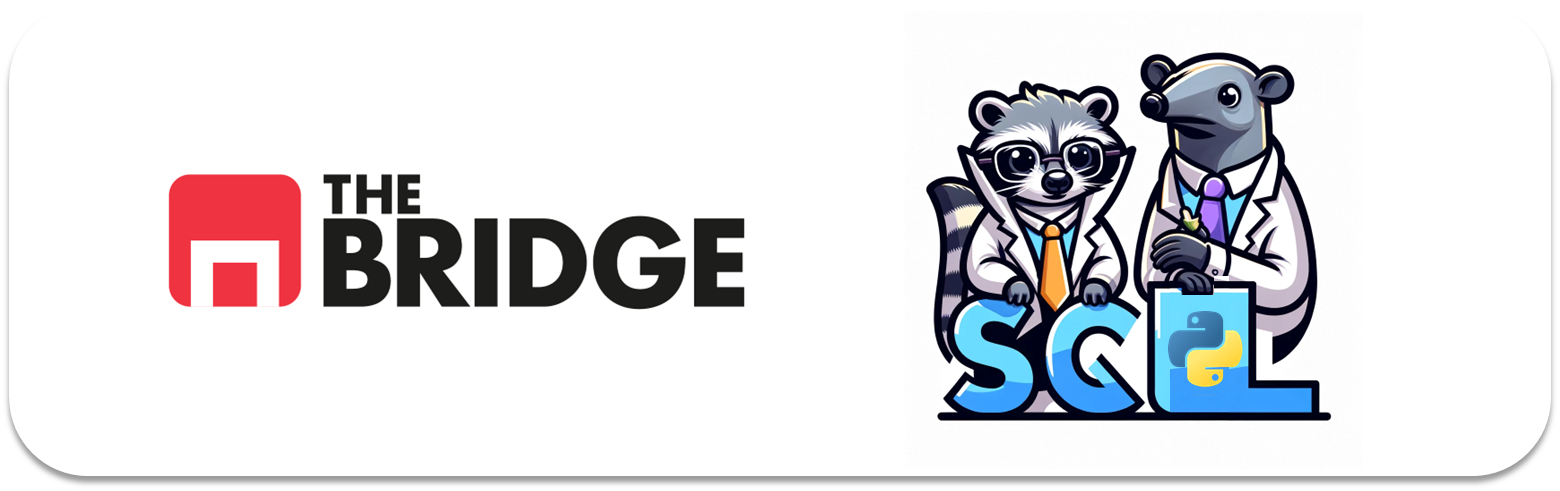


# Práctica Grupal: Diseño de Base de Datos

Para esta práctica se pide diseñar el modelo de datos con las tablas SQL, sus campos y tipos así como las relaciones de una base datos cuyas características se detallan a continuación.

## Especificaciones

Tenemos que diseñar una base de datos sobre proveedores y disponemos de la siguiente
información.

De cada proveedor conocemos:  
● Nombre  
● Dirección  
● Ciudad  
● Provincia  
● Código de proveedor (único para cada uno de ellos)  
  
Queremos llevar un control de las piezas que nos suministra cada proveedor. Es importante
conocer la cantidad de las diferentes piezas que nos suministra y en qué fecha lo hace. Un
mismo proveedor nos puede suministrar una pieza con el mismo código en diferentes
fechas.  

El diseño de la base de datos debe permitir almacenar un histórico con todas las fechas y
las cantidades que nos ha proporcionado un proveedor. Una misma pieza puede ser
suministrada por diferentes proveedores.  

De cada pieza conocemos:
- Código de pieza(único)
- Nombre
- Color
- Precio
- Categoría.  

Pueden existir varias categorías y cada categoría tiene:
- Nombre
- Código de categoría único
Una pieza sólo puede pertenecer a una categoría.

## Entregable y presentación

Se debe subir al repo un fichero con el modelo (en formato imagen o en ppt) y se hará una breve presentación del modelo y del proceso seguido para obtenerlo de no más de 5 minutos a finalizar el sprint 7.


## Extra:

Se puntuará extra entregar un notebook o script de python en el que se cree la base de datos y se rellenen con algunos datos representativos.






### Posibilidades gráficas

No es obligatorio utilizar un software específico para el diseño, de hecho es un modelo sencillo que puede generarse con unos dataframes y unas líneas en PowerPoint, pero si queréis probar aquí os dejamos dos enlaces a software con planes gratuitos:

[SqlDBM](https://sqldbm.com/)  
[LucidChart](https://www.lucidchart.com/pages/)



Y también podéis emplear la librería `graphviz`([doc aquí](https://pypi.org/project/graphviz/)) de python, aunque esta requiere instalar un software adicional ([Graphviz](https://www.graphviz.org/)). Esta librería sirve para dibujar grafos pero puede adaptarse (no de forma sencilla) para hacer modelos entidad/relacion.

***Diseño de la base de datos:***


**1.Supplier (Proveedor):**

Código único para identificar cada proveedor.
Detalles del proveedor como nombre, dirección, ciudad y estado.


**2.Part (Pieza):**

Código único para identificar cada pieza.
Detalles de la pieza como nombre, color, precio y categoría.


**3.Delivery (Entrega):**

Una tabla para rastrear las entregas realizadas por los proveedores.
Incluye la cantidad, la fecha, el proveedor y la pieza.


**4.Category (Categoría):**

Para clasificar las piezas.


In [21]:
import pandas as pd
import sqlite3
from IPython.display import display

In [ ]:
conn = sqlite3.connect('suppliers_parts.db')
cursor = conn.cursor()


cursor.execute('''
CREATE TABLE IF NOT EXISTS Category (
    category_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Supplier (
    supplier_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    address TEXT,
    city TEXT,
    state TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Part (
    part_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    color TEXT,
    price REAL,
    category_id INTEGER,
    FOREIGN KEY (category_id) REFERENCES Category(category_id)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Delivery (
    delivery_id INTEGER PRIMARY KEY,
    supplier_id INTEGER,
    part_id INTEGER,
    date TEXT,
    quantity INTEGER,
    FOREIGN KEY (supplier_id) REFERENCES Supplier(supplier_id),
    FOREIGN KEY (part_id) REFERENCES Part(part_id)
)
''')

conn.commit()
conn.close()

print("Base de datos y tablas creadas exitosamente.")


Base de datos y tablas creadas exitosamente.


In [ ]:
conn = sqlite3.connect('suppliers_parts.db')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tablas = cursor.fetchall()

print("Tablas en la base de datos:")
for tabla in tablas:
    print(f"- {tabla[0]}")


for tabla in tablas:
    print(f"\nEstructura de la tabla '{tabla[0]}':")
    cursor.execute(f"PRAGMA table_info({tabla[0]});")
    columnas = cursor.fetchall()
    for columna in columnas:
        print(f"  {columna[1]} ({columna[2]})")

conn.close()


Tablas en la base de datos:
- Category
- Supplier
- Part
- Delivery

Estructura de la tabla 'Category':
  category_id (INTEGER)
  name (TEXT)

Estructura de la tabla 'Supplier':
  supplier_id (INTEGER)
  name (TEXT)
  address (TEXT)
  city (TEXT)
  state (TEXT)

Estructura de la tabla 'Part':
  part_id (INTEGER)
  name (TEXT)
  color (TEXT)
  price (REAL)
  category_id (INTEGER)

Estructura de la tabla 'Delivery':
  delivery_id (INTEGER)
  supplier_id (INTEGER)
  part_id (INTEGER)
  date (TEXT)
  quantity (INTEGER)


**Datos de ejemplo:**

In [ ]:
conn = sqlite3.connect('suppliers_parts.db')
cursor = conn.cursor()

# Insertar datos en la tabla "Category"
categorias = [
    (1, "Electrónica"),
    (2, "Mecánica"),
    (3, "Software")
]
cursor.executemany("INSERT INTO Category (category_id, name) VALUES (?, ?)", categorias)

# Insertar datos en la tabla "Supplier"
proveedores = [
    (1, "Proveedor A", "Calle Ejemplo 1", "Madrid", "Madrid"),
    (2, "Proveedor B", "Avenida Prueba 2", "Barcelona", "Cataluña"),
    (3, "Proveedor C", "Plaza Demo 3", "Valencia", "Valencia")
]
cursor.executemany("INSERT INTO Supplier (supplier_id, name, address, city, state) VALUES (?, ?, ?, ?, ?)", proveedores)

# Insertar datos en la tabla "Part"
partes = [
    (1, "Resistor", "Marrón", 0.10, 1),
    (2, "Tornillo", "Plateado", 0.05, 2),
    (3, "Licencia de software", "N/A", 99.99, 3)
]
cursor.executemany("INSERT INTO Part (part_id, name, color, price, category_id) VALUES (?, ?, ?, ?, ?)", partes)

# Insertar datos en la tabla "Delivery"
entregas = [
    (1, 1, 1, "2024-11-01", 100),  # Proveedor A entrega 100 resistores
    (2, 2, 2, "2024-11-15", 200),  # Proveedor B entrega 200 tornillos
    (3, 3, 3, "2024-12-01", 50)    # Proveedor C entrega 50 licencias de software
]
cursor.executemany("INSERT INTO Delivery (delivery_id, supplier_id, part_id, date, quantity) VALUES (?, ?, ?, ?, ?)", entregas)

conn.commit()
conn.close()

print("Datos de ejemplo insertados correctamente.")


Datos de ejemplo insertados correctamente.


In [ ]:
conn = sqlite3.connect('suppliers_parts.db')
cursor = conn.cursor()

def mostrar_tabla(nombre_tabla):
    print(f"\nDatos de la tabla '{nombre_tabla}':")
    cursor.execute(f"SELECT * FROM {nombre_tabla}")
    datos = cursor.fetchall()
    for fila in datos:
        print(fila)


mostrar_tabla("Category")
mostrar_tabla("Supplier")
mostrar_tabla("Part")
mostrar_tabla("Delivery")

conn.close()



Datos de la tabla 'Category':
(1, 'Electrónica')
(2, 'Mecánica')
(3, 'Software')

Datos de la tabla 'Supplier':
(1, 'Proveedor A', 'Calle Ejemplo 1', 'Madrid', 'Madrid')
(2, 'Proveedor B', 'Avenida Prueba 2', 'Barcelona', 'Cataluña')
(3, 'Proveedor C', 'Plaza Demo 3', 'Valencia', 'Valencia')

Datos de la tabla 'Part':
(1, 'Resistor', 'Marrón', 0.1, 1)
(2, 'Tornillo', 'Plateado', 0.05, 2)
(3, 'Licencia de software', 'N/A', 99.99, 3)

Datos de la tabla 'Delivery':
(1, 1, 1, '2024-11-01', 100)
(2, 2, 2, '2024-11-15', 200)
(3, 3, 3, '2024-12-01', 50)


In [ ]:
conn = sqlite3.connect('suppliers_parts.db')

def mostrar_tabla_optimizada(nombre_tabla, interaktiv=True):
    query = f"SELECT * FROM {nombre_tabla}"
    df = pd.read_sql_query(query, conn)  

    if interaktiv:
        try:
            # Versuch, `display` zu verwenden (für Jupyter)
            print(f"\nDatos de la tabla '{nombre_tabla}':")
            display(df)
        except:
            # Fallback zu print(), falls `display` nicht verfügbar ist
            print(f"\nDatos de la tabla '{nombre_tabla}':")
            print(df)
    else:
        # Nur `print()` verwenden
        print(f"\nDatos de la tabla '{nombre_tabla}':")
        for fila in df.itertuples():
            print(fila)

tablas = ["Category", "Supplier", "Part", "Delivery"]
for tabla in tablas:
    mostrar_tabla_optimizada(tabla, interaktiv=True)

conn.close()



Datos de la tabla 'Category':


,category_id,name
0,1,Electrónica
1,2,Mecánica
2,3,Software



Datos de la tabla 'Supplier':


,supplier_id,name,address,city,state
0,1,Proveedor A,Calle Ejemplo 1,Madrid,Madrid
1,2,Proveedor B,Avenida Prueba 2,Barcelona,Cataluña
2,3,Proveedor C,Plaza Demo 3,Valencia,Valencia



Datos de la tabla 'Part':


,part_id,name,color,price,category_id
0,1,Resistor,Marrón,0.10,1
1,2,Tornillo,Plateado,0.05,2
2,3,Licencia de software,N/A,99.99,3



Datos de la tabla 'Delivery':


,delivery_id,supplier_id,part_id,date,quantity
0,1,1,1,2024-11-01,100
1,2,2,2,2024-11-15,200
2,3,3,3,2024-12-01,50


In [ ]:
conn = sqlite3.connect('suppliers_parts.db')

def mostrar_tabla_optimizada(nombre_tabla, interaktiv=True):
    
    query = f"SELECT * FROM {nombre_tabla}"
    df = pd.read_sql_query(query, conn)
    
    print(f"\nDatos de la tabla '{nombre_tabla}':")
    if interaktiv:
        try:
            # Interaktive, formatierte Ausgabe (z. B. in Jupyter Notebook)
            display(df)
        except:
            # Fallback auf print() bei Problemen
            print(df)
    else:
        # Standardmäßige Konsolenausgabe
        print(df)
    return df


tablas = ["Category", "Supplier", "Part", "Delivery"]

dataframes = {}
for tabla in tablas:
    dataframes[tabla] = mostrar_tabla_optimizada(tabla, interaktiv=True)

conn.close()

# Beispiel: Zugriff auf spezifische DataFrames für Analysen
df_category = dataframes["Category"]
df_supplier = dataframes["Supplier"]
df_part = dataframes["Part"]
df_delivery = dataframes["Delivery"]



Datos de la tabla 'Category':


,category_id,name
0,1,Electrónica
1,2,Mecánica
2,3,Software



Datos de la tabla 'Supplier':


,supplier_id,name,address,city,state
0,1,Proveedor A,Calle Ejemplo 1,Madrid,Madrid
1,2,Proveedor B,Avenida Prueba 2,Barcelona,Cataluña
2,3,Proveedor C,Plaza Demo 3,Valencia,Valencia



Datos de la tabla 'Part':


,part_id,name,color,price,category_id
0,1,Resistor,Marrón,0.10,1
1,2,Tornillo,Plateado,0.05,2
2,3,Licencia de software,N/A,99.99,3



Datos de la tabla 'Delivery':


,delivery_id,supplier_id,part_id,date,quantity
0,1,1,1,2024-11-01,100
1,2,2,2,2024-11-15,200
2,3,3,3,2024-12-01,50


3. Abfrage mit Python überprüfen:

In [24]:
conn = sqlite3.connect('suppliers_parts.db')
cursor = conn.cursor()


def ejecutar_consulta(consulta):
    cursor.execute(consulta)
    resultados = cursor.fetchall()
    print("\nResultados de la consulta:")
    for fila in resultados:
        print(fila)


consulta = """
SELECT Supplier.name, Part.name, Delivery.date, Delivery.quantity
FROM Delivery
JOIN Supplier ON Delivery.supplier_id = Supplier.supplier_id
JOIN Part ON Delivery.part_id = Part.part_id
WHERE Delivery.quantity > 100
ORDER BY Delivery.date
"""
ejecutar_consulta(consulta)

conn.close()



Resultados de la consulta:
('Proveedor B', 'Tornillo', '2024-11-15', 200)


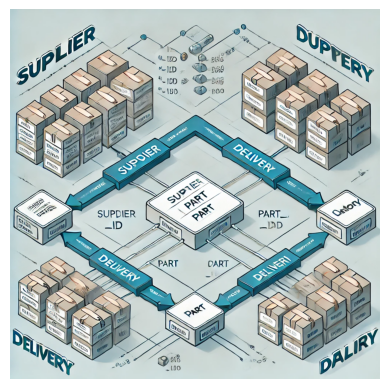

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

bild_pfad = "diagram.webp"
bild = Image.open(bild_pfad)

plt.imshow(bild)
plt.axis('off')  
plt.show()


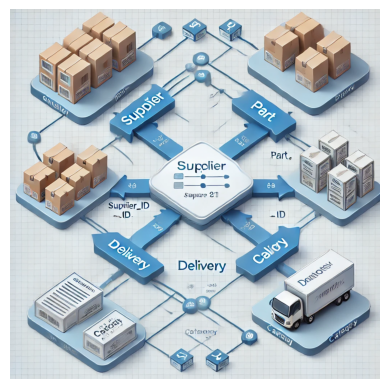

In [31]:
bild_pfad = "diagram2.webp"
bild = Image.open(bild_pfad)

plt.imshow(bild)
plt.axis('off')  
plt.show()

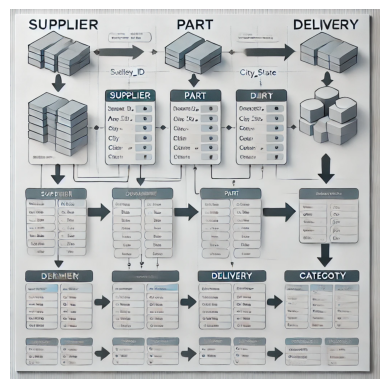

In [32]:
bild_pfad = "diagram3.webp"
bild = Image.open(bild_pfad)

plt.imshow(bild)
plt.axis('off')  
plt.show()

# Modelo de datos y flujo de relaciones


---

### **Tablas principales**

#### **1. Supplier (Proveedor)**
| **Columna**     | **Tipo de dato** | **Descripción**                     |
|------------------|------------------|-------------------------------------|
| `supplier_id`    | INTEGER          | Identificador único del proveedor   |
| `name`           | TEXT             | Nombre del proveedor                |
| `address`        | TEXT             | Dirección del proveedor             |
| `city`           | TEXT             | Ciudad del proveedor                |
| `state`          | TEXT             | Estado o región del proveedor       |

---

#### **2. Part (Parte o Componente)**
| **Columna**     | **Tipo de dato** | **Descripción**                     |
|------------------|------------------|-------------------------------------|
| `part_id`        | INTEGER          | Identificador único de la parte     |
| `name`           | TEXT             | Nombre del componente               |
| `color`          | TEXT             | Color del componente                |
| `price`          | REAL             | Precio del componente               |
| `category_id`    | INTEGER          | Identificador de la categoría       |

---

#### **3. Delivery (Entrega)**
| **Columna**     | **Tipo de dato** | **Descripción**                     |
|------------------|------------------|-------------------------------------|
| `delivery_id`    | INTEGER          | Identificador único de la entrega   |
| `supplier_id`    | INTEGER          | Identificador del proveedor         |
| `part_id`        | INTEGER          | Identificador del componente        |
| `date`           | TEXT             | Fecha de la entrega                 |
| `quantity`       | INTEGER          | Cantidad entregada                  |

---

#### **4. Category (Categoría)**
| **Columna**     | **Tipo de dato** | **Descripción**                     |
|------------------|------------------|-------------------------------------|
| `category_id`    | INTEGER          | Identificador único de la categoría |
| `name`           | TEXT             | Nombre de la categoría              |

---

### **Relaciones**
| **Tabla**    | **Tabla Relacionada** | **Columna Clave**          | **Descripción**                           |
|--------------|------------------------|----------------------------|-------------------------------------------|
| Supplier     | Delivery               | `supplier_id`              | Un proveedor puede realizar múltiples entregas. |
| Part         | Delivery               | `part_id`                  | Una parte puede estar involucrada en múltiples entregas. |
| Part         | Category               | `category_id`              | Cada parte está clasificada en una categoría. |

---

### **Flujo de datos**
1. **Supplier → Delivery**: Los proveedores registran entregas en la tabla de entregas (**Delivery**).
2. **Part → Delivery**: Cada entrega incluye detalles sobre los componentes entregados.
3. **Part → Category**: Los componentes están organizados por categorías.

---



# Descripción de los diagramas y flujo de datos


## Tablas principales
1. **Supplier**: Representa a los proveedores, identificados por un código único (`supplier_id`). Incluye información como el nombre y la dirección.
2. **Part**: Almacena las piezas o productos suministrados. Cada pieza tiene un código único (`part_id`) y detalles como el nombre, el color, el precio y su categoría.
3. **Delivery**: Es la tabla intermedia que conecta a los proveedores y las piezas. Registra las entregas con información como la cantidad (`quantity`), la fecha (`date`), el proveedor y la pieza involucrada.
4. **Category**: Clasifica las piezas en diferentes categorías, identificadas por `category_id`.

## Relaciones entre tablas
- **Supplier** se relaciona con **Delivery** a través del campo `supplier_id`. Esto permite rastrear qué proveedor hizo cada entrega.
- **Part** se relaciona con **Delivery** mediante `part_id`. Esto ayuda a identificar qué pieza fue entregada.
- **Part** también se conecta con **Category** usando el campo `category_id`, lo que permite clasificar las piezas en grupos.

## Flujo de datos
1. Un proveedor (en **Supplier**) suministra piezas (en **Part**) a través de entregas registradas en la tabla **Delivery**.
2. Cada entrega incluye información detallada sobre la fecha, la cantidad y la pieza entregada.
3. La tabla **Category** ayuda a organizar y filtrar las piezas según su tipo.

## Propósito del sistema
Este diseño permite:
- Hacer un seguimiento histórico de las entregas.
- Analizar qué proveedores suministran ciertas piezas.
- Identificar las piezas más entregadas o el total de entregas realizadas por un proveedor.
